In [1]:
#import matplotlib
#matplotlib.use("Qt5Agg")

In [2]:
#pip install PyQt6

### Description
Conditions: 
<ul>
    <li>C1 = low interference, easy search</li>
    <li>C2 = low interference, hard search</li>
    <li>C3 = high interference, easy search</li>
    <li>C4 = high interference, hard search</li>
</ul>

In [3]:
import numpy as np
import pandas as pd

from visbrain.gui import Brain
from visbrain.objects import SourceObj, BrainObj, ColorbarObj, SceneObj
from visbrain.io import download_file, read_stc

import nilearn
from nilearn import datasets, surface, plotting
from nilearn.image import concat_imgs, mean_img
from nibabel import freesurfer as fs

/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load data and compute mean across conditions

In [5]:
# Paths to access files
home_dir = "DistractWM/"
c1_pc_path = "/graph_metrics/pc_cond1_space.npy"
c2_pc_path = "/graph_metrics/pc_cond2_space.npy"
c3_pc_path = "/graph_metrics/pc_cond3_space.npy"
c4_pc_path = "/graph_metrics/pc_cond4_space.npy"

c1_wcs_path = "/graph_metrics/wcs_cond1_space.npy"
c2_wcs_path = "/graph_metrics/wcs_cond2_space.npy"
c3_wcs_path = "/graph_metrics/wcs_cond3_space.npy"
c4_wcs_path = "/graph_metrics/wcs_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

# Average of each ........ 11 scores 
c1_pc_total = [] 
c2_pc_total = [] 
c3_pc_total = [] 
c4_pc_total = []

c1_wcs_total = [] 
c2_wcs_total = [] 
c3_wcs_total = [] 
c4_wcs_total = []

# Creat psudo-empty dataframe
c1_pc_df = pd.DataFrame()
c2_pc_df = pd.DataFrame()
c3_pc_df = pd.DataFrame()
c4_pc_df = pd.DataFrame()

c1_wcs_df = pd.DataFrame()
c2_wcs_df = pd.DataFrame()
c3_wcs_df = pd.DataFrame()
c4_wcs_df = pd.DataFrame()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    """Omitting participant 103 because Nan input"""
    if(not((num == 103) or (num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_pc_path1 = home_dir + name + c1_pc_path
        full_pc_path2 = home_dir + name + c2_pc_path
        full_pc_path3 = home_dir + name + c3_pc_path
        full_pc_path4 = home_dir + name + c4_pc_path
        
        full_wcs_path1 = home_dir + name + c1_wcs_path
        full_wcs_path2 = home_dir + name + c2_wcs_path
        full_wcs_path3 = home_dir + name + c3_wcs_path
        full_wcs_path4 = home_dir + name + c4_wcs_path
        
        # Loading data     
        pc_c1 = np.load(full_pc_path1) 
        pc_c2 = np.load(full_pc_path2) 
        pc_c3 = np.load(full_pc_path3) 
        pc_c4 = np.load(full_pc_path4) 
        
        wcs_c1 = np.load(full_wcs_path1) 
        wcs_c2 = np.load(full_wcs_path2) 
        wcs_c3 = np.load(full_wcs_path3) 
        wcs_c4 = np.load(full_wcs_path4) 
        
        c1_pc_total.append(pc_c1)
        c2_pc_total.append(pc_c2)
        c3_pc_total.append(pc_c3)
        c4_pc_total.append(pc_c4)
        
        c1_wcs_total.append(wcs_c1)
        c2_wcs_total.append(wcs_c2)
        c3_wcs_total.append(wcs_c3)
        c4_wcs_total.append(wcs_c4)
        
        c1_pc_mean = np.mean(pc_c1, axis=0)
        c2_pc_mean = np.mean(pc_c2, axis=0)
        c3_pc_mean = np.mean(pc_c3, axis=0)
        c4_pc_mean = np.mean(pc_c4, axis=0)
        
        c1_wcs_mean = np.mean(wcs_c1, axis=0)
        c2_wcs_mean = np.mean(wcs_c2, axis=0)
        c3_wcs_mean = np.mean(wcs_c3, axis=0)
        c4_wcs_mean = np.mean(wcs_c4, axis=0)
        
        # Appending data to df
        c1_pc_df[name] = c1_pc_mean
        c2_pc_df[name] = c2_pc_mean
        c3_pc_df[name] = c3_pc_mean
        c4_pc_df[name] = c4_pc_mean
        
        c1_wcs_df[name] = c1_wcs_mean
        c2_wcs_df[name] = c2_wcs_mean
        c3_wcs_df[name] = c3_wcs_mean
        c4_wcs_df[name] = c4_wcs_mean

             
print("c1_pc_df shape: " + str(c1_pc_df.shape))
print("c2_pc_df shape: " + str(c2_pc_df.shape))
print("c3_pc_df shape: " + str(c3_pc_df.shape))
print("c4_pc_df shape: " + str(c4_pc_df.shape))

print("c1_wcs_df shape: " + str(c1_wcs_df.shape))
print("c2_wcs_df shape: " + str(c2_wcs_df.shape))
print("c3_wcs_df shape: " + str(c3_wcs_df.shape))
print("c4_wcs_df shape: " + str(c4_wcs_df.shape))

c1_pc_df shape: (400, 26)
c2_pc_df shape: (400, 26)
c3_pc_df shape: (400, 26)
c4_pc_df shape: (400, 26)
c1_wcs_df shape: (400, 26)
c2_wcs_df shape: (400, 26)
c3_wcs_df shape: (400, 26)
c4_wcs_df shape: (400, 26)


In [6]:
c1_total_pc_mean = np.array(c1_pc_df.mean(axis=1))
c2_total_pc_mean = np.array(c2_pc_df.mean(axis=1))
c3_total_pc_mean = np.array(c3_pc_df.mean(axis=1))
c4_total_pc_mean = np.array(c4_pc_df.mean(axis=1))

print("c1_total_pc_mean shape: " + str(c1_total_pc_mean.shape))
print("c2_total_pc_mean shape: " + str(c2_total_pc_mean.shape))
print("c3_total_pc_mean shape: " + str(c3_total_pc_mean.shape))
print("c4_total_pc_mean shape: " + str(c4_total_pc_mean.shape))

c1_total_wcs_mean = np.array(c1_wcs_df.mean(axis=1))
c2_total_wcs_mean = np.array(c2_wcs_df.mean(axis=1))
c3_total_wcs_mean = np.array(c3_wcs_df.mean(axis=1))
c4_total_wcs_mean = np.array(c4_wcs_df.mean(axis=1))

print("c1_total_wcs_mean shape: " + str(c1_total_wcs_mean.shape))
print("c2_total_wcs_mean shape: " + str(c2_total_wcs_mean.shape))
print("c3_total_wcs_mean shape: " + str(c3_total_wcs_mean.shape))
print("c4_total_wcs_mean shape: " + str(c4_total_wcs_mean.shape))

c1_total_pc_mean shape: (400,)
c2_total_pc_mean shape: (400,)
c3_total_pc_mean shape: (400,)
c4_total_pc_mean shape: (400,)
c1_total_wcs_mean shape: (400,)
c2_total_wcs_mean shape: (400,)
c3_total_wcs_mean shape: (400,)
c4_total_wcs_mean shape: (400,)


## Compute differences between conditions

In [7]:
pc_c1_minus_c2 = np.array(c1_total_pc_mean - c2_total_pc_mean)
pc_c1_minus_c3 = np.array(c1_total_pc_mean - c3_total_pc_mean)
pc_c1_minus_c4 = np.array(c1_total_pc_mean - c4_total_pc_mean)
pc_c2_minus_c3 = np.array(c2_total_pc_mean - c3_total_pc_mean)
pc_c2_minus_c4 = np.array(c2_total_pc_mean - c4_total_pc_mean)
pc_c3_minus_c4 = np.array(c3_total_pc_mean - c4_total_pc_mean)

print("pc_c1_minus_c2 shape: " + str(pc_c1_minus_c2.shape))
print("pc_c1_minus_c3 shape: " + str(pc_c1_minus_c3.shape))
print("pc_c1_minus_c4 shape: " + str(pc_c1_minus_c4.shape))
print("pc_c2_minus_c3 shape: " + str(pc_c2_minus_c3.shape))
print("pc_c2_minus_c4 shape: " + str(pc_c2_minus_c4.shape))
print("pc_c3_minus_c4 shape: " + str(pc_c3_minus_c4.shape))

wcs_c1_minus_c2 = np.array(c1_total_wcs_mean - c2_total_wcs_mean)
wcs_c1_minus_c3 = np.array(c1_total_wcs_mean - c3_total_wcs_mean)
wcs_c1_minus_c4 = np.array(c1_total_wcs_mean - c4_total_wcs_mean)
wcs_c2_minus_c3 = np.array(c2_total_wcs_mean - c3_total_wcs_mean)
wcs_c2_minus_c4 = np.array(c2_total_wcs_mean - c4_total_wcs_mean)
wcs_c3_minus_c4 = np.array(c3_total_wcs_mean - c4_total_wcs_mean)

print("wcs_c1_minus_c2 shape: " + str(wcs_c1_minus_c2.shape))
print("wcs_c1_minus_c3 shape: " + str(wcs_c1_minus_c3.shape))
print("wcs_c1_minus_c4 shape: " + str(wcs_c1_minus_c4.shape))
print("wcs_c2_minus_c3 shape: " + str(wcs_c2_minus_c3.shape))
print("wcs_c2_minus_c4 shape: " + str(wcs_c2_minus_c4.shape))
print("wcs_c3_minus_c4 shape: " + str(wcs_c3_minus_c4.shape))


pc_c1_minus_c2 shape: (400,)
pc_c1_minus_c3 shape: (400,)
pc_c1_minus_c4 shape: (400,)
pc_c2_minus_c3 shape: (400,)
pc_c2_minus_c4 shape: (400,)
pc_c3_minus_c4 shape: (400,)
wcs_c1_minus_c2 shape: (400,)
wcs_c1_minus_c3 shape: (400,)
wcs_c1_minus_c4 shape: (400,)
wcs_c2_minus_c3 shape: (400,)
wcs_c2_minus_c4 shape: (400,)
wcs_c3_minus_c4 shape: (400,)


## Get coordinates from each node

In [8]:
# Get Schatlas info
# Get parcellation atlas from nilearn
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2)

# Visualize parcellation atlas
atlas_maps = atlas_file.maps

# Get coordinates and labels
# This coordinates work for (B1, B2, B3, white) surfaces
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_maps, return_label_names=False)
print("coordinates shape: " + str(coordinates.shape))

coordinates_left = coordinates[0:200, :]
coordinates_right = coordinates[200:400, :]
print("coordinates_left shape: " + str(coordinates_left.shape))
print("coordinates_right shape: " + str(coordinates_right.shape))

B3_coords_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
B3_coords_df.head()

coordinates shape: (400, 3)
coordinates_left shape: (200, 3)
coordinates_right shape: (200, 3)


x          y          z
0 -35.365696 -62.032362 -17.055016
1 -23.350588 -72.696471 -10.296471
2 -36.414566 -81.389356 -15.966387
3 -16.950000 -86.387500 -14.987500
4 -24.406780 -96.745763 -11.924670

## Create Function to remove background and save images

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def SaveImg_RemoveBackground(scene, name2save):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    pil_img.save(str(name2save), "PNG")

In [10]:
# Edit coords 
fixed_coords_left = coordinates[0:200]
fixed_coords_left[0:200, 0] = fixed_coords_left[0:200, 0] + 5

fixed_coords_right = coordinates[200:400]
fixed_coords_right[0:200, 0] = fixed_coords_right[0:200, 0] - 5

print(fixed_coords_left.shape)

(200, 3)


In [11]:

"""
from visbrain.gui import Brain

kwargs = {}

kwargs['alpha'] = 0.7

kwargs['data'] = pc_c1_minus_c2[0:200]

kwargs['radius_min'] = 12             
kwargs['radius_max'] = 12 
kwargs['symbol'] = 'o' 

s_obj = SourceObj('SourceExample', fixed_coords_left, **kwargs)
s_obj.color_sources(data=kwargs['data'], cmap='viridis')

b_obj = BrainObj('B3', hemisphere="both", translucent=False)
#b_obj_vert = b_obj.vertices
    
#s_obj.fit_to_vertices(b_obj_vert)

vb = Brain(source_obj=s_obj, brain_obj=b_obj, rotate="right", bgcolor="black")
vb.show()


#render = vb.render()
#print(render.shape)
#name3 = "vb"

#SaveImg_RemoveBackground(vb, name3)
#path = "sc_pc_c1_minus_c2_inner.png" 
#vb.screenshot(canvas="main", saveas=path, print_size=(20, 20), unit='centimeter', dpi=300., autocrop=True, transparent=True) 


"""



'\nfrom visbrain.gui import Brain\n\nkwargs = {}\n\nkwargs[\'alpha\'] = 0.7\n\nkwargs[\'data\'] = pc_c1_minus_c2[0:200]\n\nkwargs[\'radius_min\'] = 12             \nkwargs[\'radius_max\'] = 12 \nkwargs[\'symbol\'] = \'o\' \n\ns_obj = SourceObj(\'SourceExample\', fixed_coords_left, **kwargs)\ns_obj.color_sources(data=kwargs[\'data\'], cmap=\'viridis\')\n\nb_obj = BrainObj(\'B3\', hemisphere="both", translucent=False)\n#b_obj_vert = b_obj.vertices\n    \n#s_obj.fit_to_vertices(b_obj_vert)\n\nvb = Brain(source_obj=s_obj, brain_obj=b_obj, rotate="right", bgcolor="black")\nvb.show()\n\n\n#render = vb.render()\n#print(render.shape)\n#name3 = "vb"\n\n#SaveImg_RemoveBackground(vb, name3)\n#path = "sc_pc_c1_minus_c2_inner.png" \n#vb.screenshot(canvas="main", saveas=path, print_size=(20, 20), unit=\'centimeter\', dpi=300., autocrop=True, transparent=True) \n\n\n'

In [12]:
#p =

## Plot PC (C1 - C2) (low interference, easy search - low interference, hard search)

In [13]:
# Create Scene 
sc_pc_c1_minus_c2_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_pc_c1_minus_c2_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


In [14]:
b_obj = BrainObj('B3', hemisphere="both", translucent=False)
alt_vertices = b_obj.vertices*10000
print(alt_vertices.shape)

def add_B3_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add C1 data
    kwargs['data'] = data

    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'     
    s_obj_c1 = SourceObj('SourceExample', coords, **kwargs)

    # Add color to nodes
    s_obj_c1.color_sources(data=kwargs['data'], cmap='viridis')

    # Create 'Brain object'
    b_obj_c1 = BrainObj('B3', hemisphere=hemisphere, translucent=False) #vertices=alt_vertices
    #b_obj_c1.vertices = b_obj_c1.vertices*1000
    
    # Fit nodes to vertices
    #s_obj_c1.fit_to_vertices(b_obj_c1_vert)
    
    # Add objects to scene
    
    scene.add_to_subplot(s_obj_c1, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    scene.add_to_subplot(b_obj_c1, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True )
   
    

BrainObj(name='B3') created


(81924, 3)


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


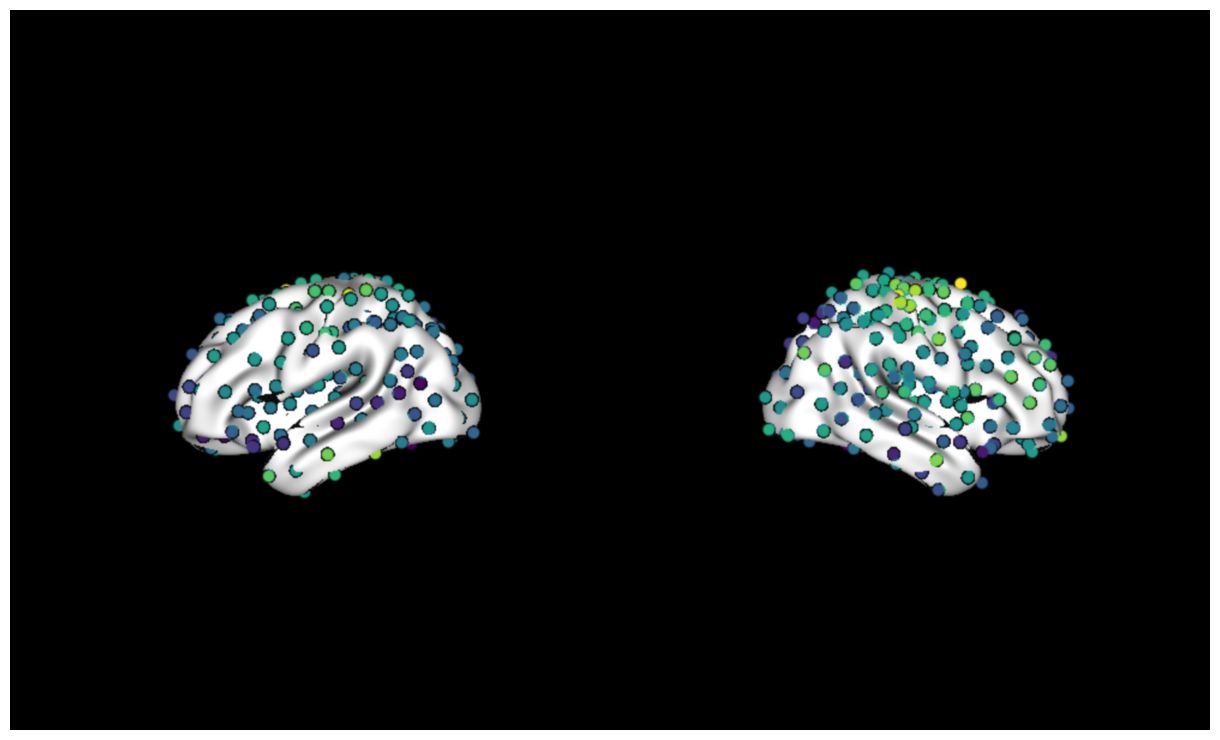

In [15]:
add_B3_to_scene(scene=sc_pc_c1_minus_c2_outer, data=pc_c1_minus_c2, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_pc_c1_minus_c2_outer, data=pc_c1_minus_c2, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
sc_pc_c1_minus_c2_outer.preview()


In [16]:
name = "pc_c1_minus_c2_outer"
SaveImg_RemoveBackground(sc_pc_c1_minus_c2_outer, name)




In [ ]:
add_B3_to_scene(scene=sc_pc_c1_minus_c2_inner, data=pc_c1_minus_c2[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_pc_c1_minus_c2_inner, data=pc_c1_minus_c2[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c2_inner.preview()


In [18]:
name2 = "pc_c1_minus_c2_inner"
SaveImg_RemoveBackground(sc_pc_c1_minus_c2_inner, name2)


## Plot PC (C1 - C3) (low interference, easy search - high interference, easy search)

In [19]:
# Create Scene 
sc_pc_c1_minus_c3_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_pc_c1_minus_c3_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


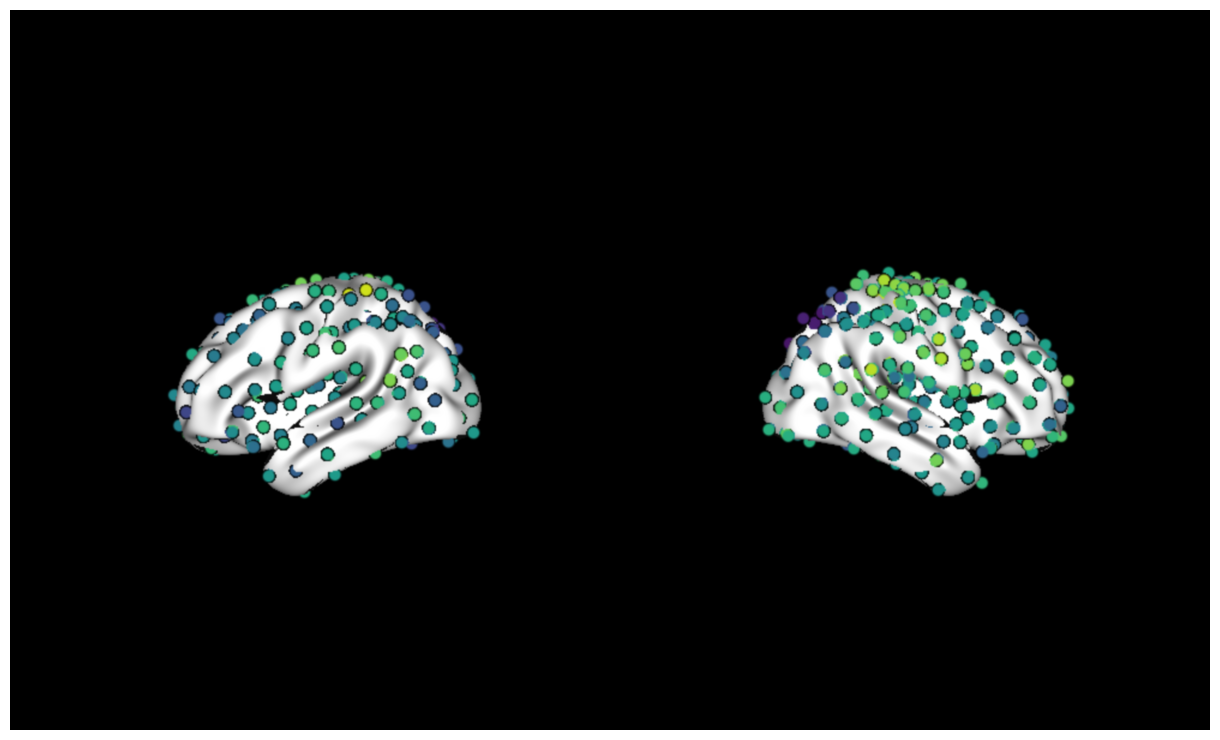

In [20]:
add_B3_to_scene(scene=sc_pc_c1_minus_c3_outer, data=pc_c1_minus_c3, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_pc_c1_minus_c3_outer, data=pc_c1_minus_c3, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
sc_pc_c1_minus_c3_outer.preview()


SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


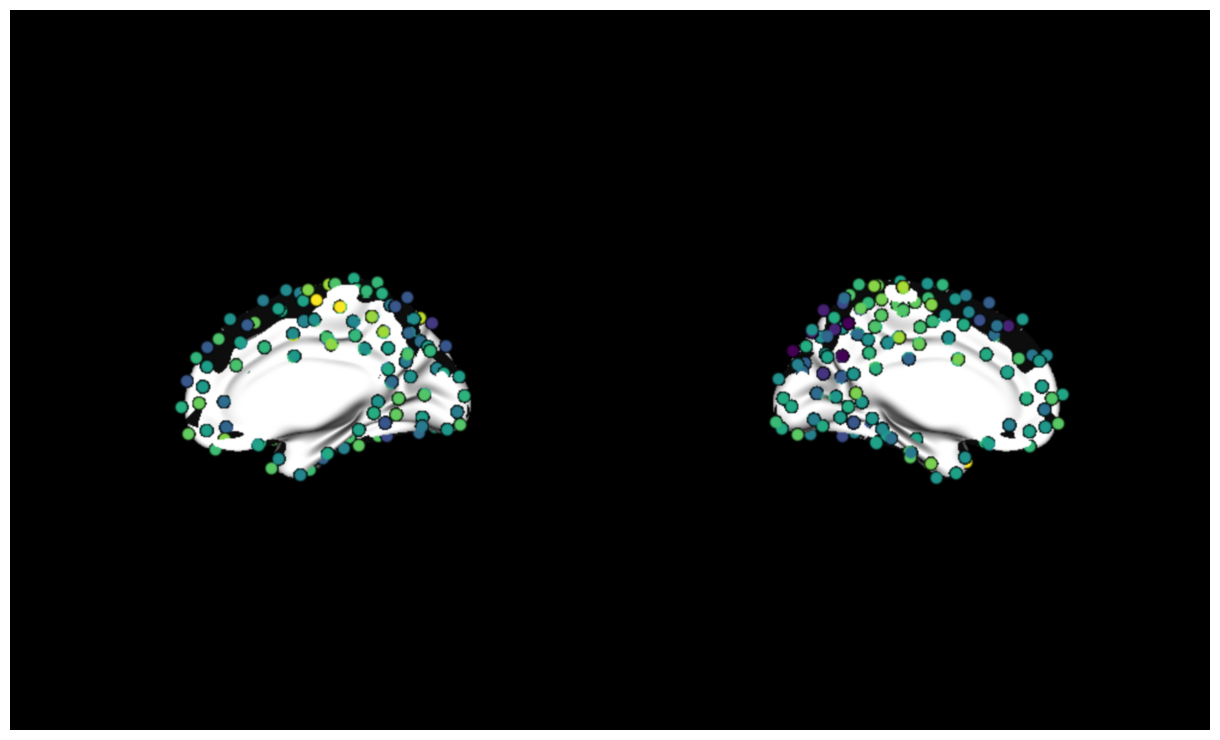

In [21]:
add_B3_to_scene(scene=sc_pc_c1_minus_c3_inner, data=pc_c1_minus_c3[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_pc_c1_minus_c3_inner, data=pc_c1_minus_c3[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c3_inner.preview()

## Plot PC (C1 - C4) (low interference, easy search - high interference, hard search)

In [22]:
# Create Scene 
sc_pc_c1_minus_c4_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_pc_c1_minus_c4_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


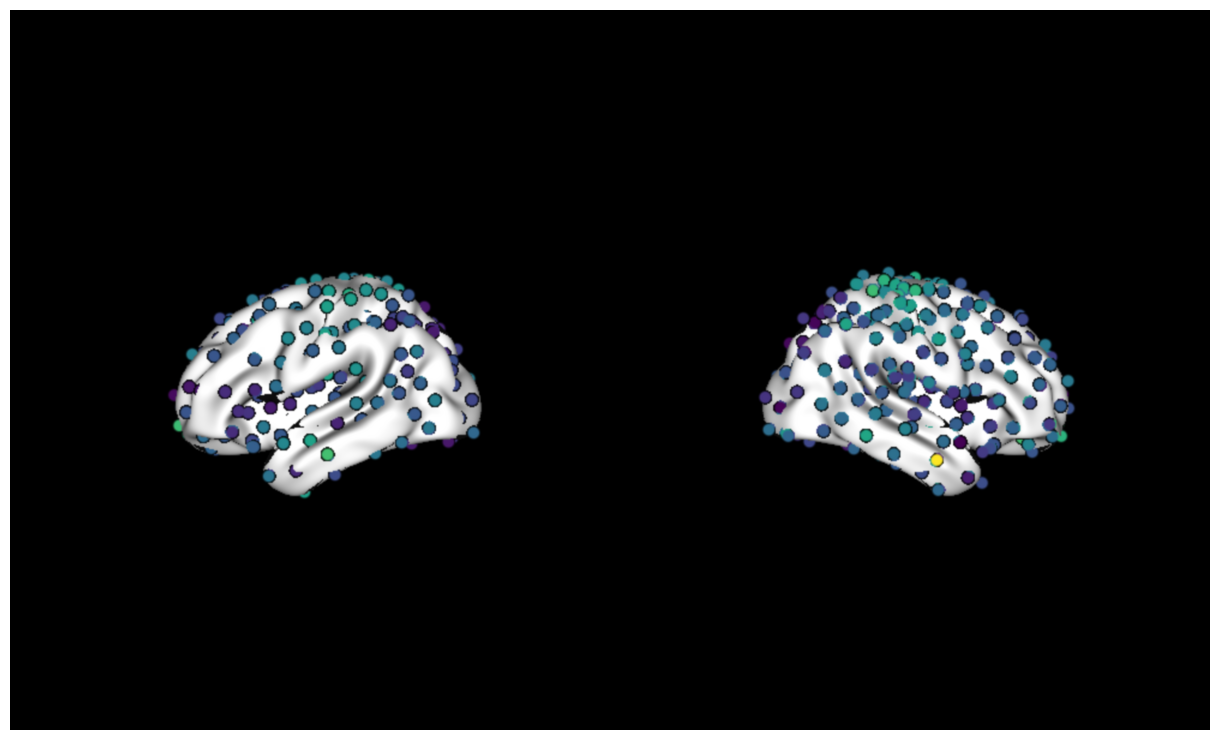

In [23]:
add_B3_to_scene(scene=sc_pc_c1_minus_c4_outer, data=pc_c1_minus_c4, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_pc_c1_minus_c4_outer, data=pc_c1_minus_c4, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
sc_pc_c1_minus_c4_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


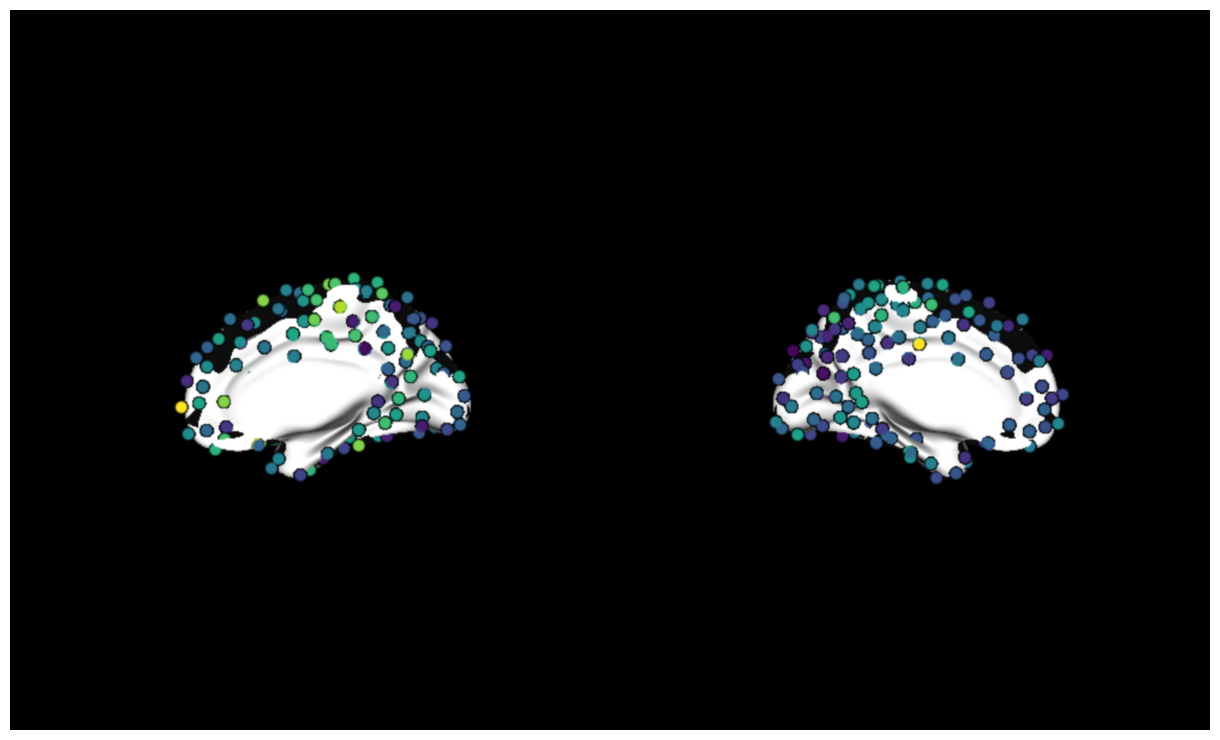

In [24]:
add_B3_to_scene(scene=sc_pc_c1_minus_c4_inner, data=pc_c1_minus_c4[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_pc_c1_minus_c4_inner, data=pc_c1_minus_c4[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c4_inner.preview()

## Plot PC (C2 - C3) (low interference, hard search - high interference, easy search)

In [25]:
# Create Scene 
sc_pc_c2_minus_c3_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_pc_c2_minus_c3_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


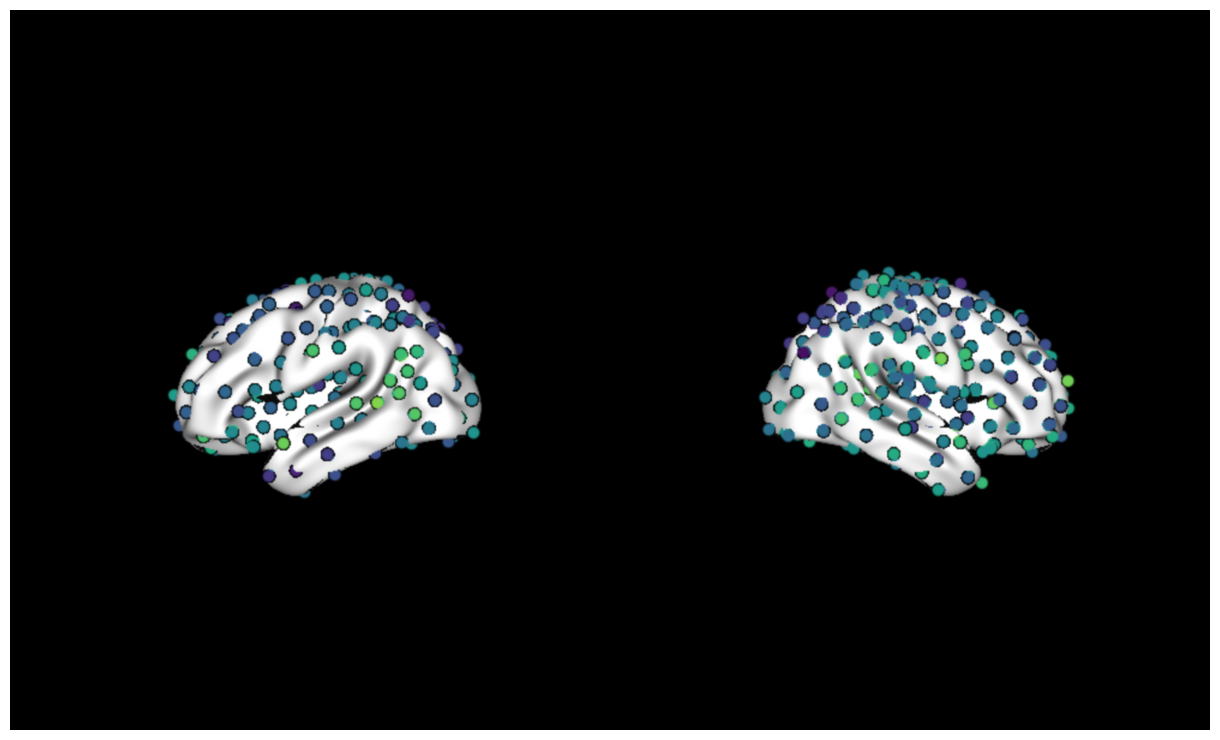

In [26]:
add_B3_to_scene(scene=sc_pc_c2_minus_c3_outer, data=pc_c2_minus_c3, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_pc_c2_minus_c3_outer, data=pc_c2_minus_c3, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c2_minus_c3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


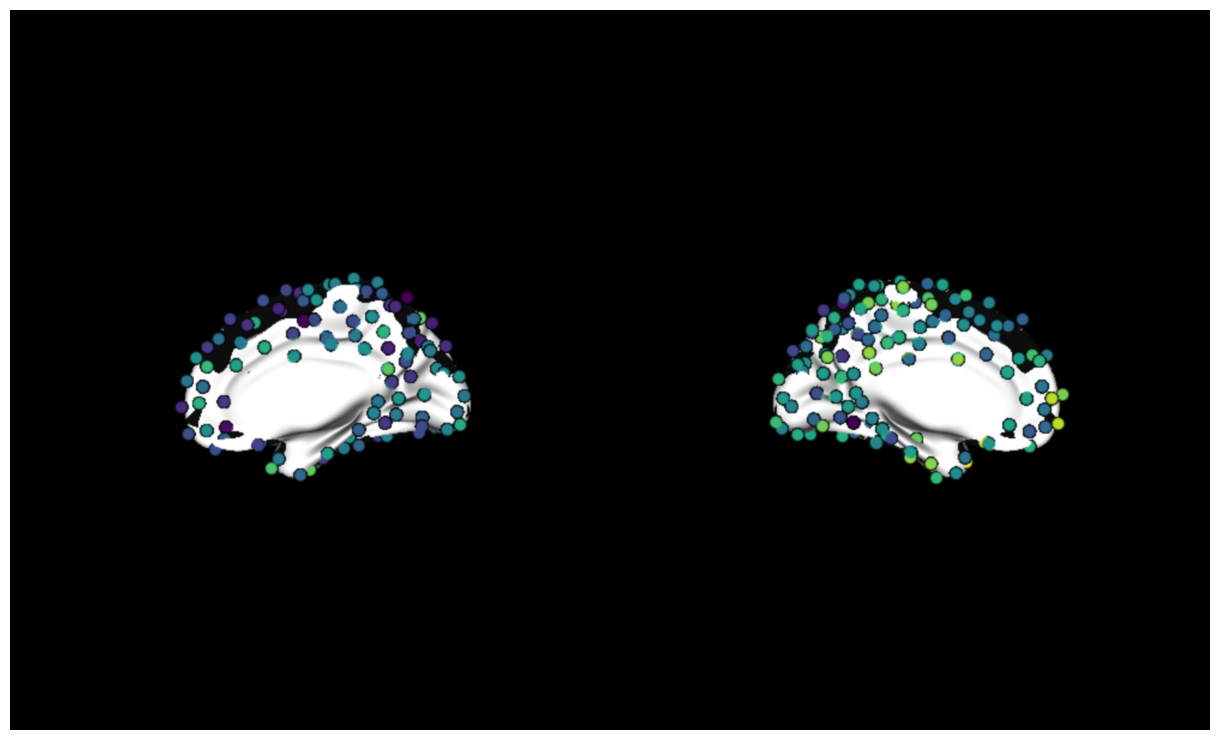

In [27]:
add_B3_to_scene(scene=sc_pc_c2_minus_c3_inner, data=pc_c2_minus_c3[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_pc_c2_minus_c3_inner, data=pc_c2_minus_c3[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c2_minus_c3_inner.preview()

## Plot PC (C2 - C4) (low interference, hard search - high interference, hard search)

In [28]:
# Create Scene 
sc_pc_c2_minus_c4_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_pc_c2_minus_c4_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


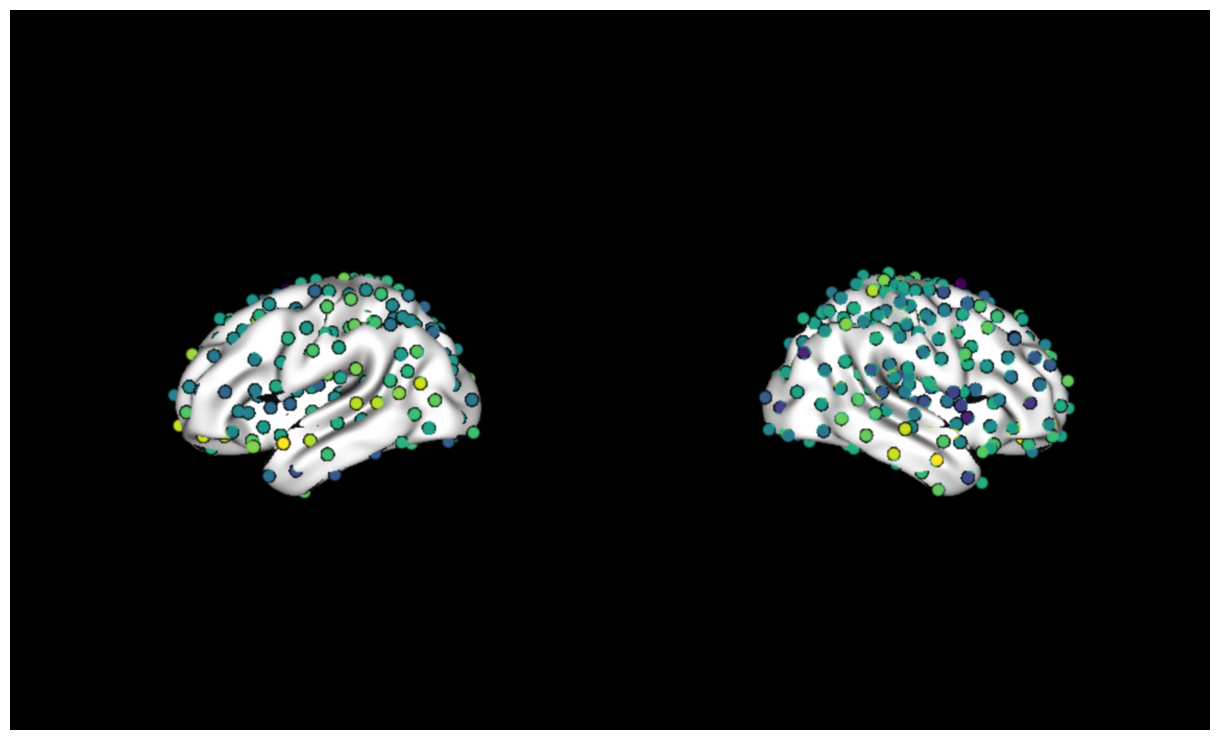

In [29]:
add_B3_to_scene(scene=sc_pc_c2_minus_c4_outer, data=pc_c2_minus_c4, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_pc_c2_minus_c4_outer, data=pc_c2_minus_c4, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
sc_pc_c2_minus_c4_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


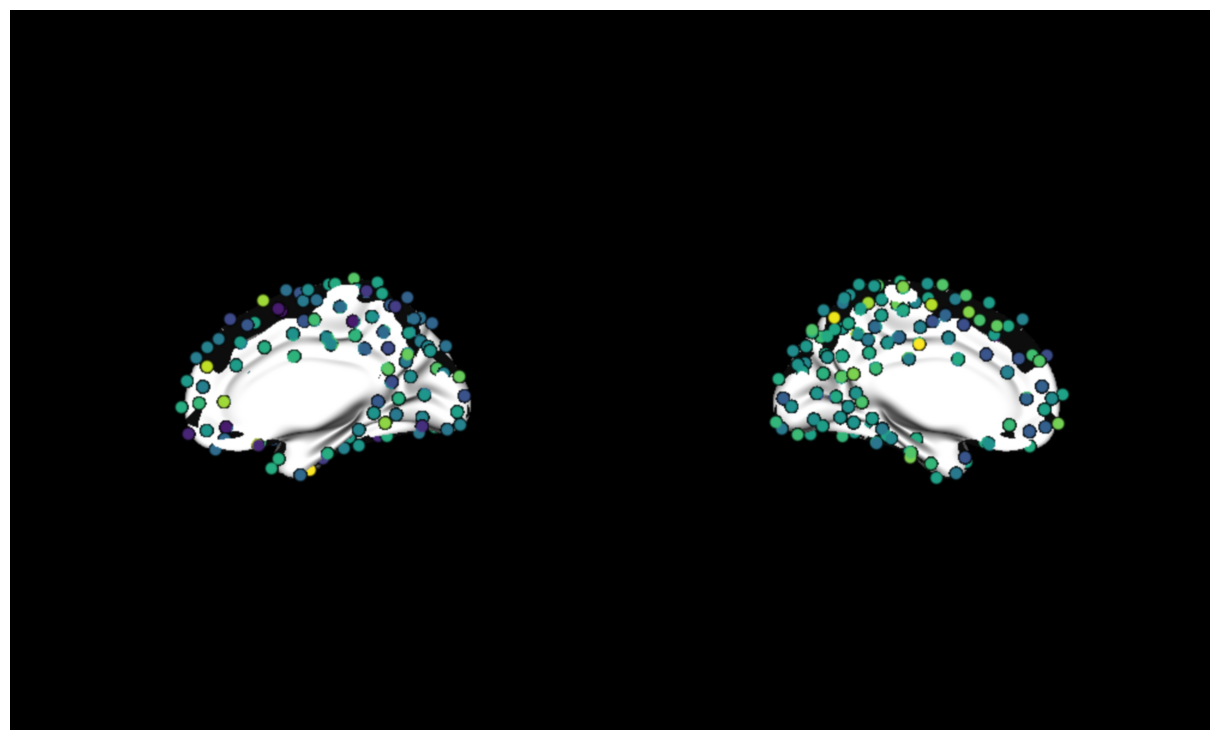

In [30]:
add_B3_to_scene(scene=sc_pc_c2_minus_c4_inner, data=pc_c2_minus_c4[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_pc_c2_minus_c4_inner, data=pc_c2_minus_c4[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c2_minus_c4_inner.preview()

## Plot PC (C3 - C4) (high interference, easy search - high interference, hard search)

In [31]:
# Create Scene 
sc_pc_c3_minus_c4_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_pc_c3_minus_c4_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


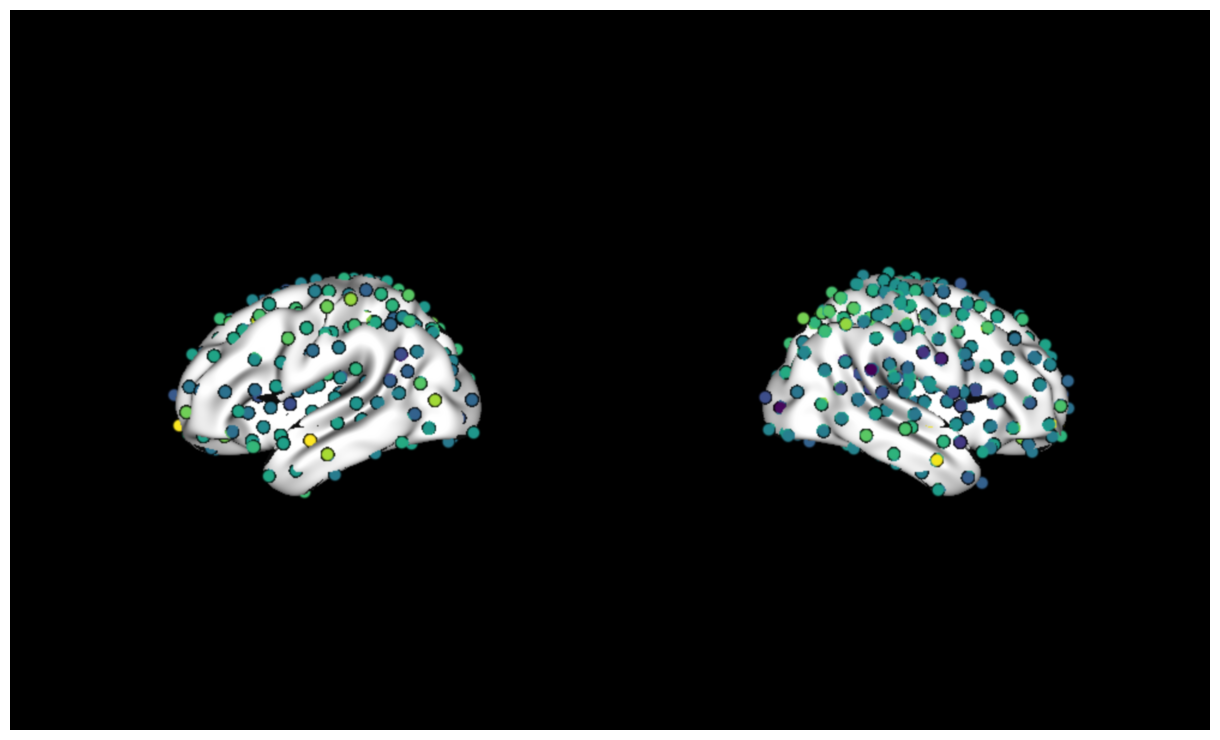

In [32]:
add_B3_to_scene(scene=sc_pc_c3_minus_c4_outer, data=pc_c3_minus_c4, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_pc_c3_minus_c4_outer, data=pc_c3_minus_c4, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
sc_pc_c3_minus_c4_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


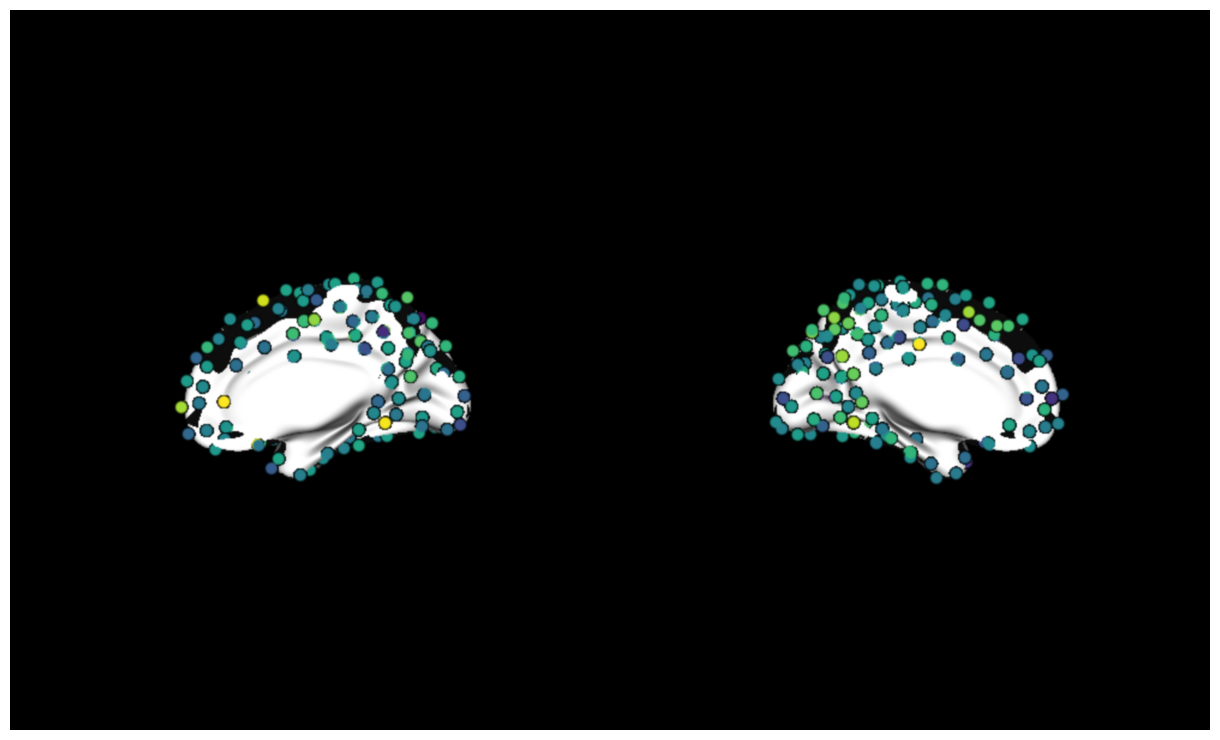

In [33]:
add_B3_to_scene(scene=sc_pc_c3_minus_c4_inner, data=pc_c3_minus_c4[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_pc_c3_minus_c4_inner, data=pc_c3_minus_c4[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c3_minus_c4_inner.preview()

## Plot WCS (C1 - C2) (low interference, easy search - low interference, hard search)

In [34]:
# Create Scene 
sc_wcs_c1_minus_c2_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_wcs_c1_minus_c2_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


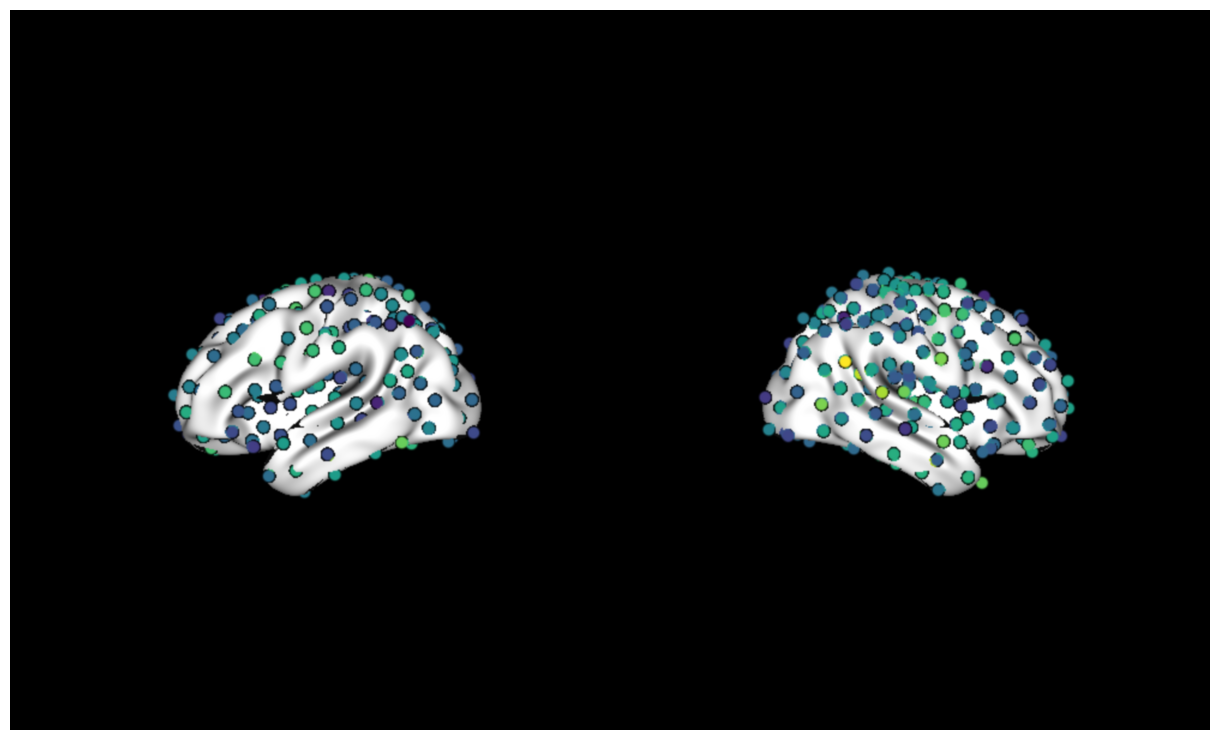

In [35]:
add_B3_to_scene(scene=sc_wcs_c1_minus_c2_outer, data=wcs_c1_minus_c2, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_wcs_c1_minus_c2_outer, data=wcs_c1_minus_c2, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c2_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


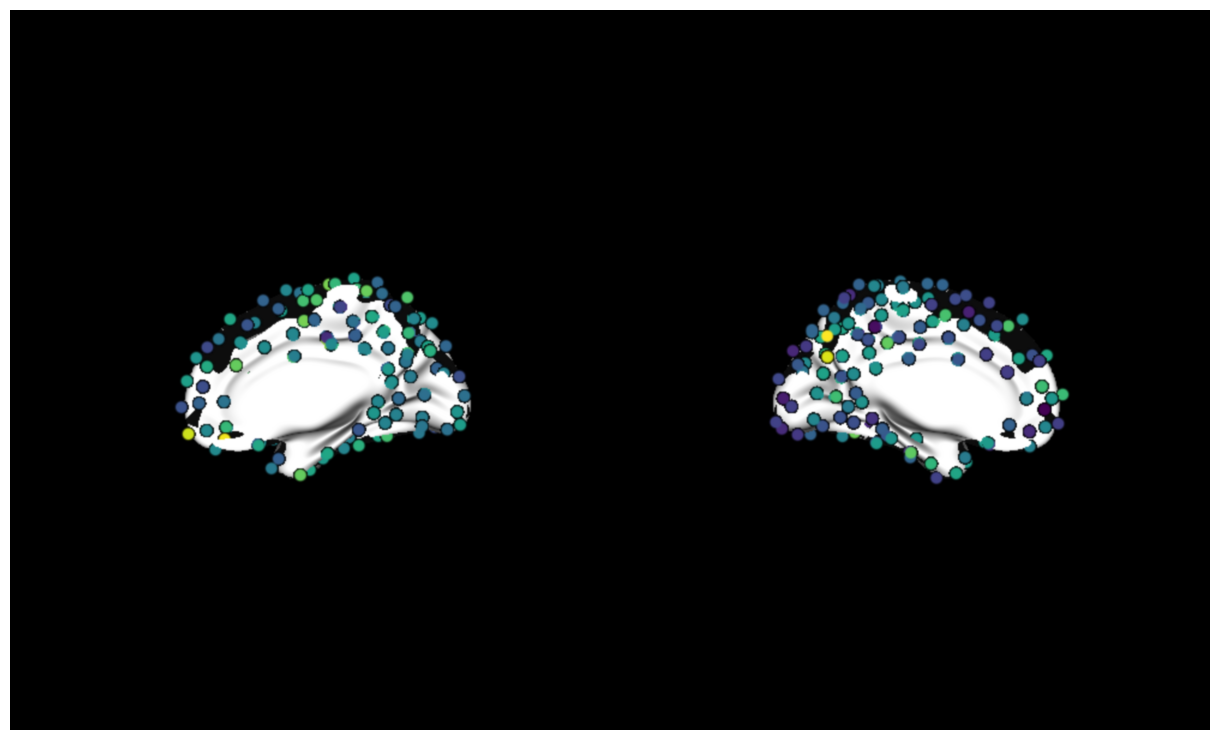

In [36]:
add_B3_to_scene(scene=sc_wcs_c1_minus_c2_inner, data=wcs_c1_minus_c2[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_wcs_c1_minus_c2_inner, data=wcs_c1_minus_c2[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c2_inner.preview()


## Plot WCS (C1 - C3) (low interference, easy search - high interference, easy search)

In [37]:
# Create Scene 
sc_wcs_c1_minus_c3_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_wcs_c1_minus_c3_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


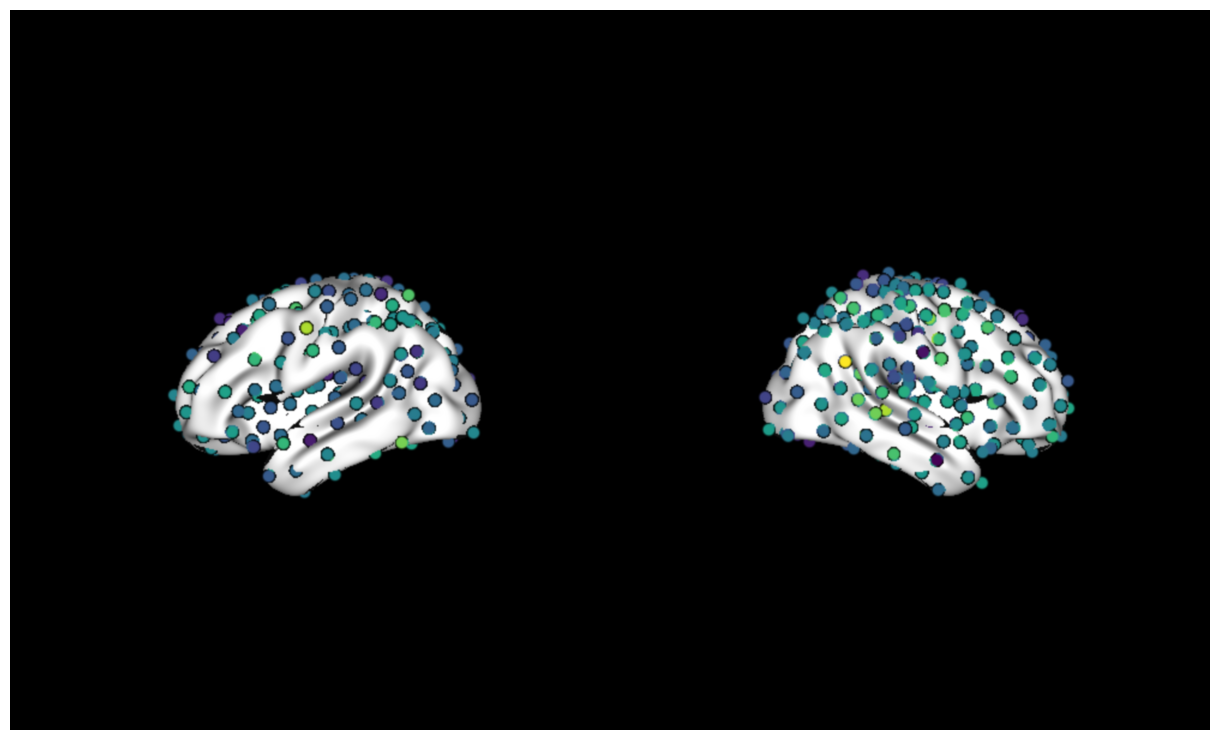

In [38]:
add_B3_to_scene(scene=sc_wcs_c1_minus_c3_outer, data=wcs_c1_minus_c3, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_wcs_c1_minus_c3_outer, data=wcs_c1_minus_c3, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


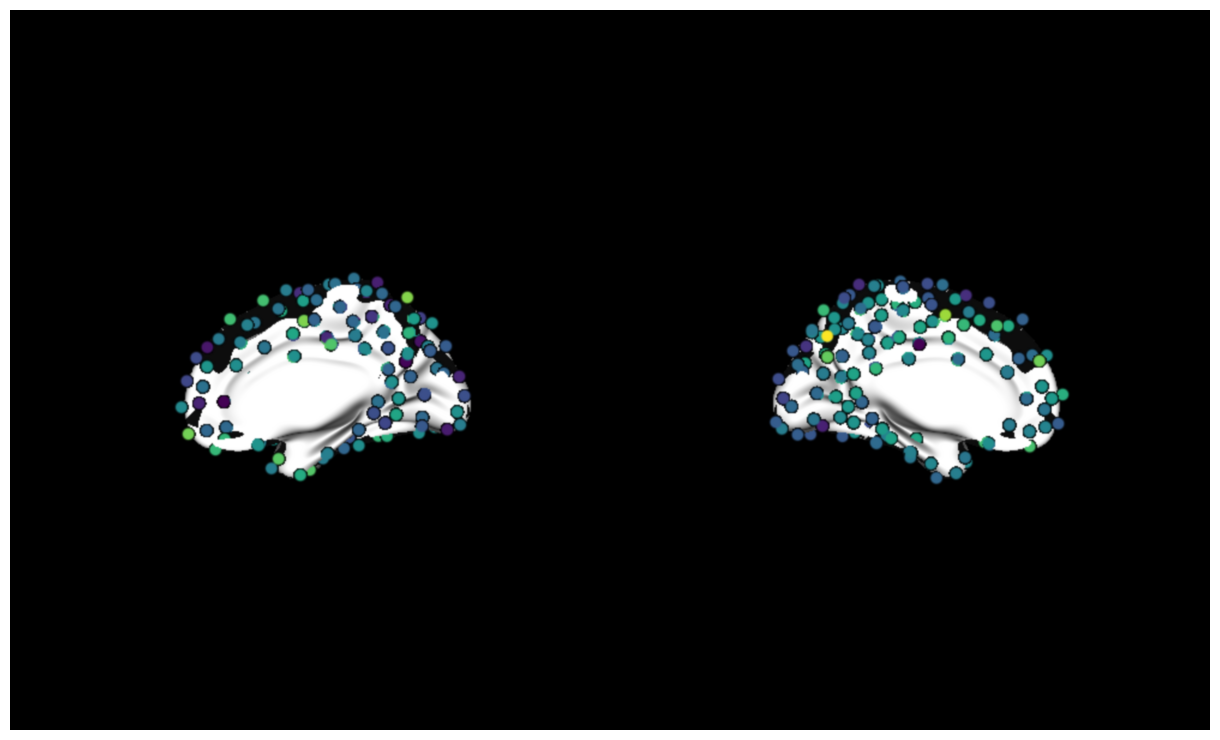

In [39]:
add_B3_to_scene(scene=sc_wcs_c1_minus_c3_inner, data=wcs_c1_minus_c3[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_wcs_c1_minus_c3_inner, data=wcs_c1_minus_c3[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c3_inner.preview()


## Plot WCS (C1 - C4) (low interference, easy search - high interference, hard search)

In [40]:
# Create Scene 
sc_wcs_c1_minus_c4_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_wcs_c1_minus_c4_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


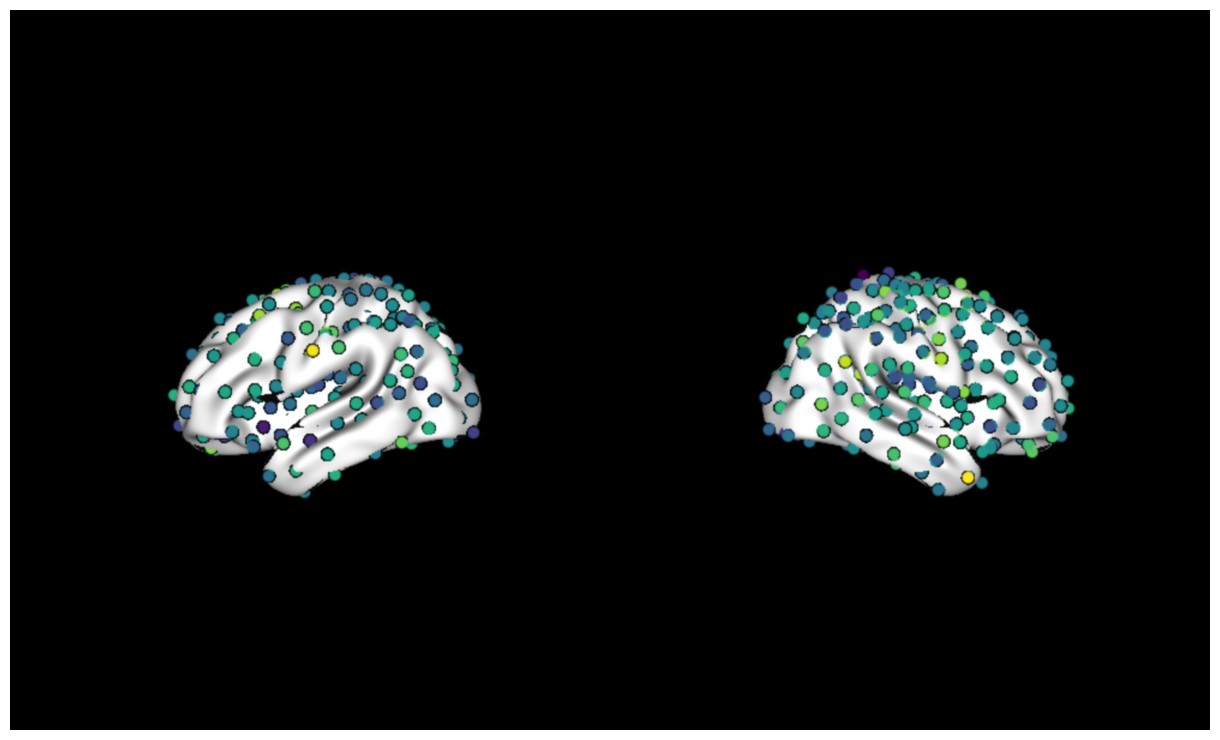

In [41]:
add_B3_to_scene(scene=sc_wcs_c1_minus_c4_outer, data=wcs_c1_minus_c4, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_wcs_c1_minus_c4_outer, data=wcs_c1_minus_c4, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c4_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


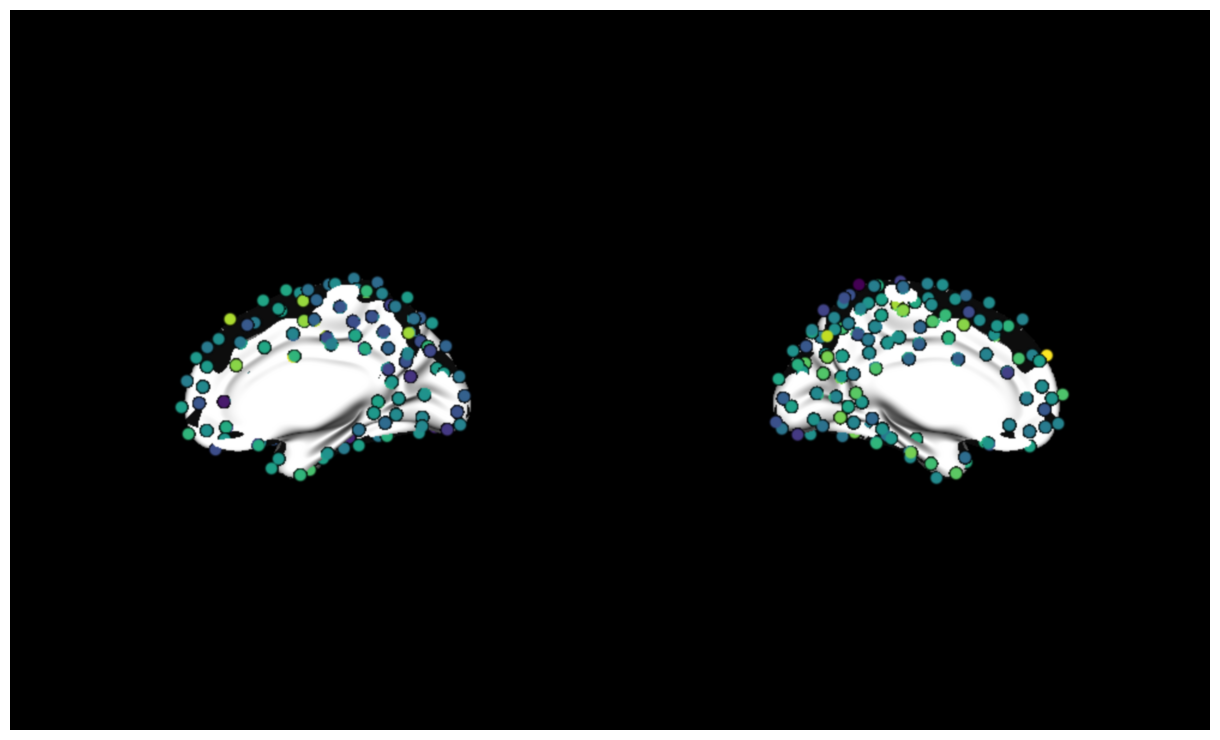

In [42]:
add_B3_to_scene(scene=sc_wcs_c1_minus_c4_inner, data=wcs_c1_minus_c4[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_wcs_c1_minus_c4_inner, data=wcs_c1_minus_c4[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c4_inner.preview()

## Plot WCS (C2 - C3) (low interference, hard search - high interference, easy search)

In [43]:
# Create Scene 
sc_wcs_c2_minus_c3_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_wcs_c2_minus_c3_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


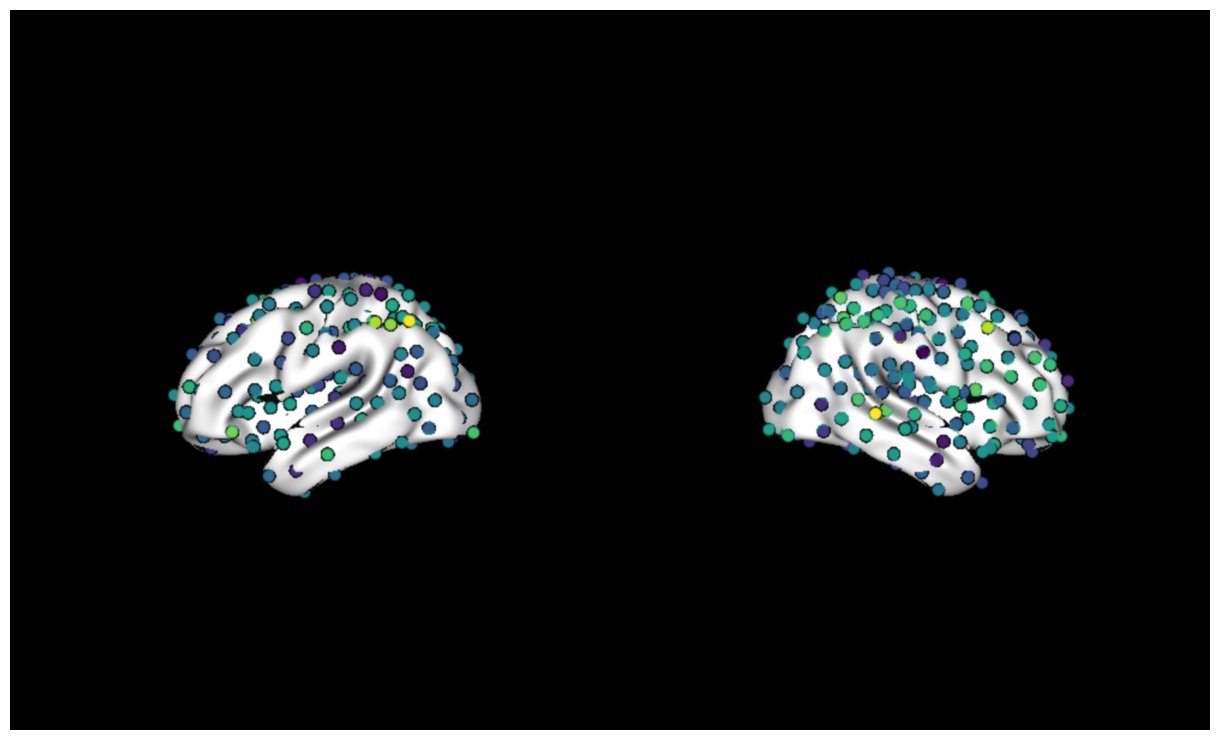

In [44]:
add_B3_to_scene(scene=sc_wcs_c2_minus_c3_outer, data=wcs_c2_minus_c3, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_wcs_c2_minus_c3_outer, data=wcs_c2_minus_c3, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c2_minus_c3_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


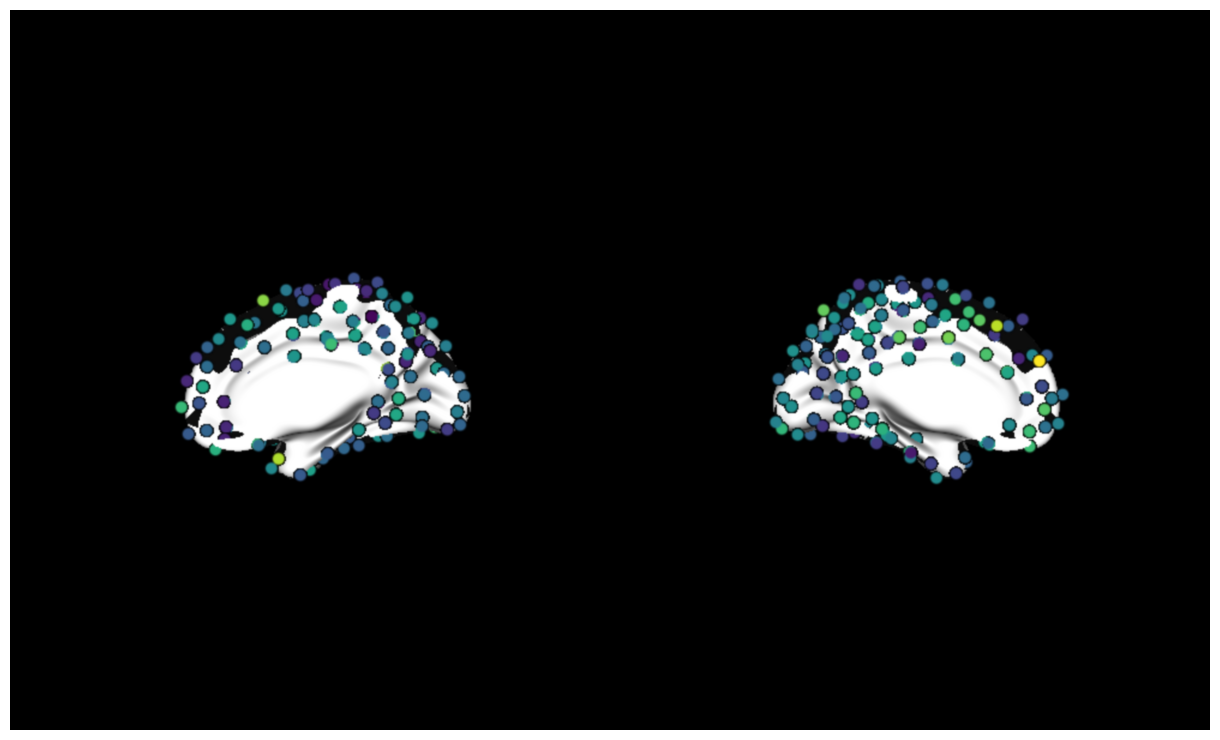

In [45]:
add_B3_to_scene(scene=sc_wcs_c2_minus_c3_inner, data=wcs_c2_minus_c3[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_wcs_c2_minus_c3_inner, data=wcs_c2_minus_c3[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c2_minus_c3_inner.preview()

## Plot WCS (C2 - C4) (low interference, hard search - high interference, hard search)


In [46]:
# Create Scene 
sc_wcs_c2_minus_c4_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_wcs_c2_minus_c4_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


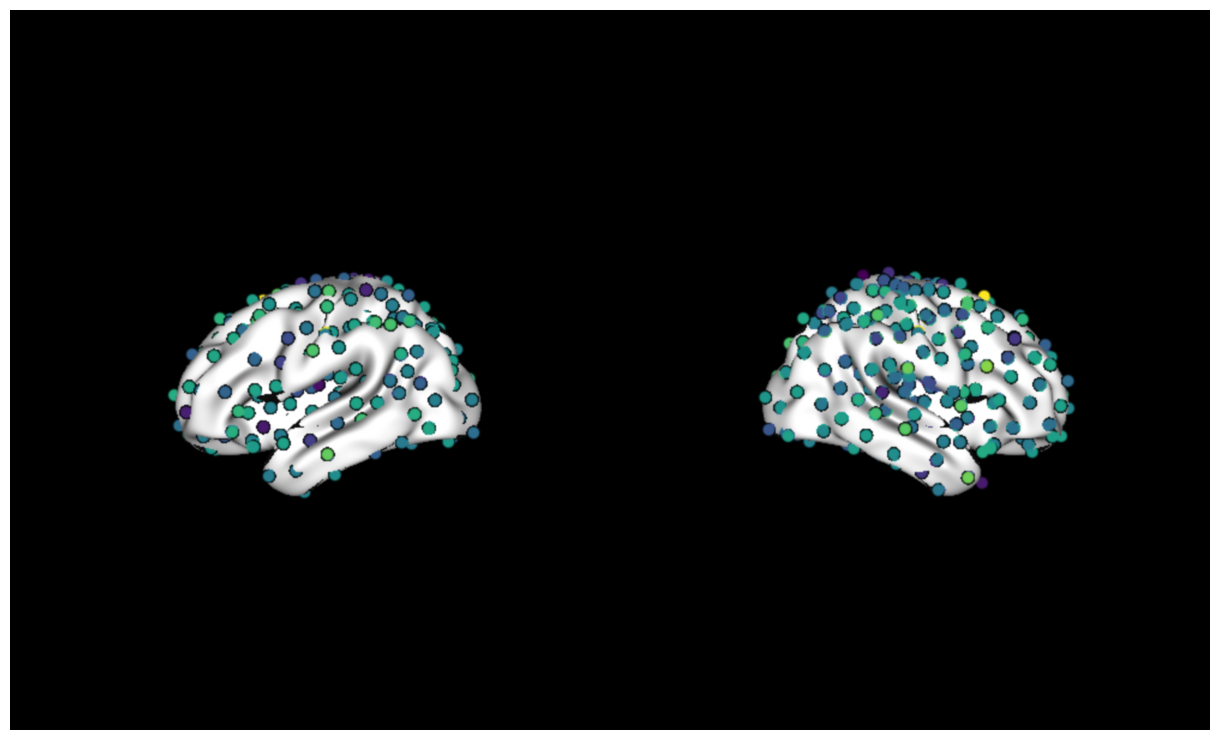

In [47]:
add_B3_to_scene(scene=sc_wcs_c2_minus_c4_outer, data=wcs_c2_minus_c4, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_wcs_c2_minus_c4_outer, data=wcs_c2_minus_c4, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c2_minus_c4_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


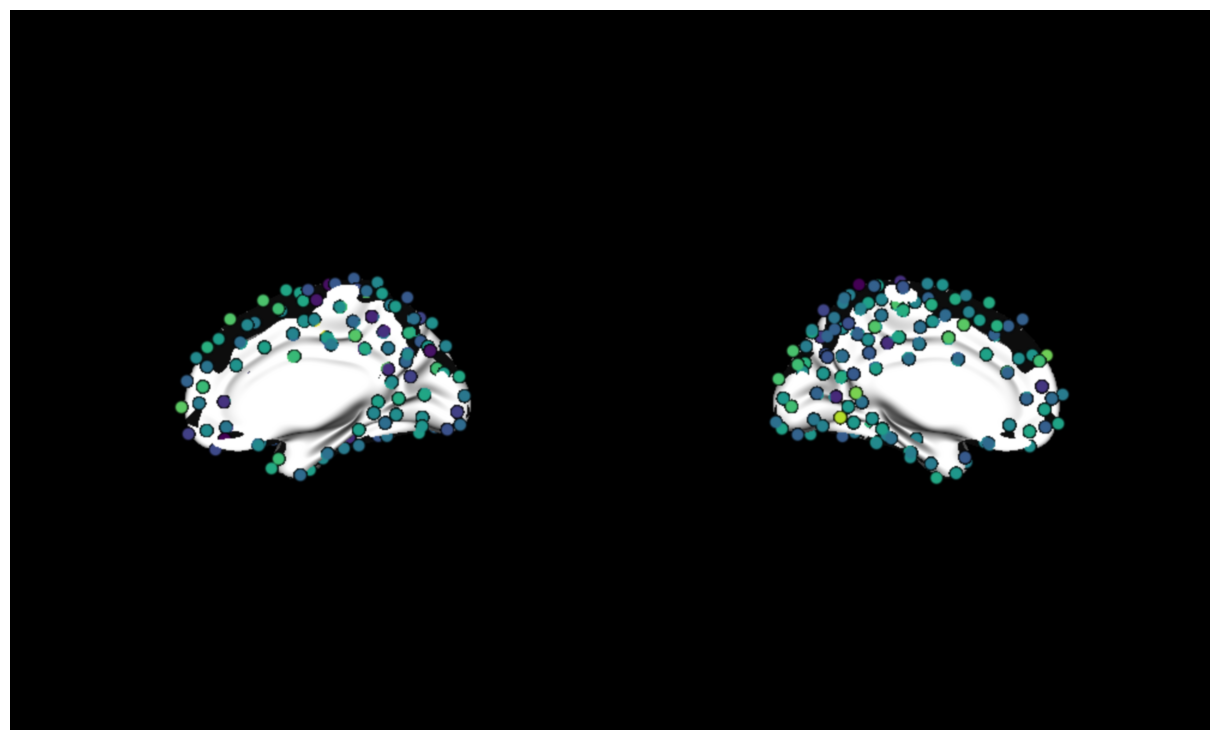

In [48]:
add_B3_to_scene(scene=sc_wcs_c2_minus_c4_inner, data=wcs_c2_minus_c4[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_wcs_c2_minus_c4_inner, data=wcs_c2_minus_c4[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c2_minus_c4_inner.preview()

## Plot WCS (C3 - C4) (high interference, easy search - high interference, hard search)

In [49]:
# Create Scene 
sc_wcs_c3_minus_c4_outer = SceneObj(bgcolor='black', size=(1000, 600))
sc_wcs_c3_minus_c4_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1.2)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


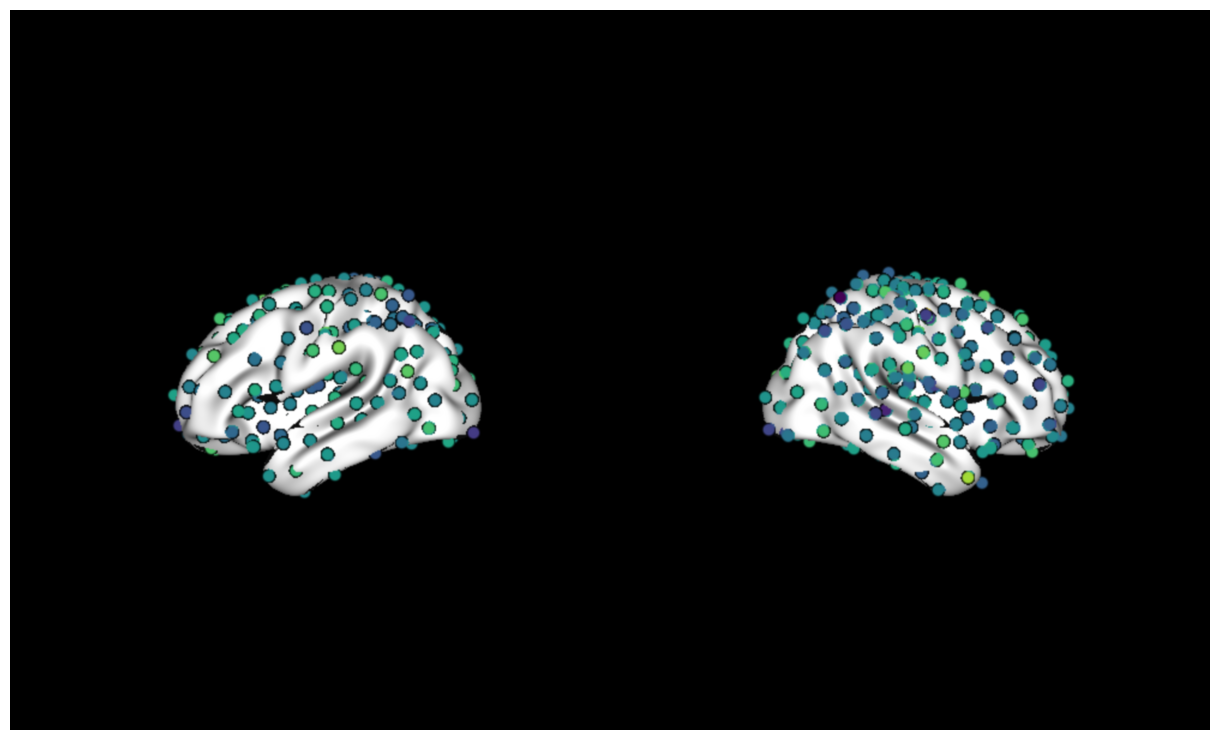

In [50]:
add_B3_to_scene(scene=sc_wcs_c3_minus_c4_outer, data=wcs_c3_minus_c4, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=sc_wcs_c3_minus_c4_outer, data=wcs_c3_minus_c4, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c3_minus_c4_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


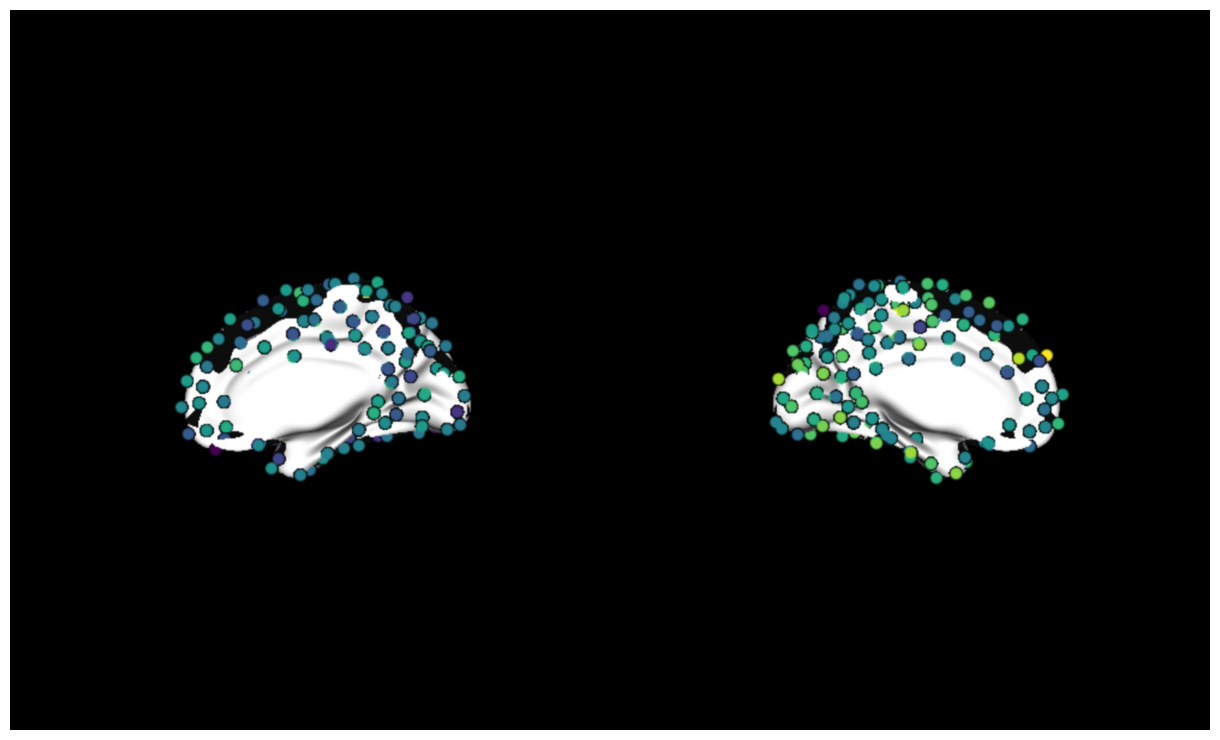

In [51]:
add_B3_to_scene(scene=sc_wcs_c3_minus_c4_inner, data=wcs_c3_minus_c4[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=sc_wcs_c3_minus_c4_inner, data=wcs_c3_minus_c4[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c3_minus_c4_inner.preview()

In [52]:
pip install PyOpenGL -U

Requirement already up-to-date: PyOpenGL in /Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages (3.1.5)
Note: you may need to restart the kernel to use updated packages.


In [53]:
#pip install -U vispy==0.6.0

In [54]:
#path = "sc_pc_c1_minus_c2_inner.png" #Documents/#GitHub/Summer_2021_fMRI/Differences_Between_Conditions/
#sc_pc_c1_minus_c2_inner.render()
#sc_pc_c1_minus_c2_inner.screenshot(saveas=path, print_size=(20, 20), unit='centimeter', dpi=300., autocrop=True, transparent=True) 
#unit="pixel", factor=(3840, 2160) 